In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

(0, 6)

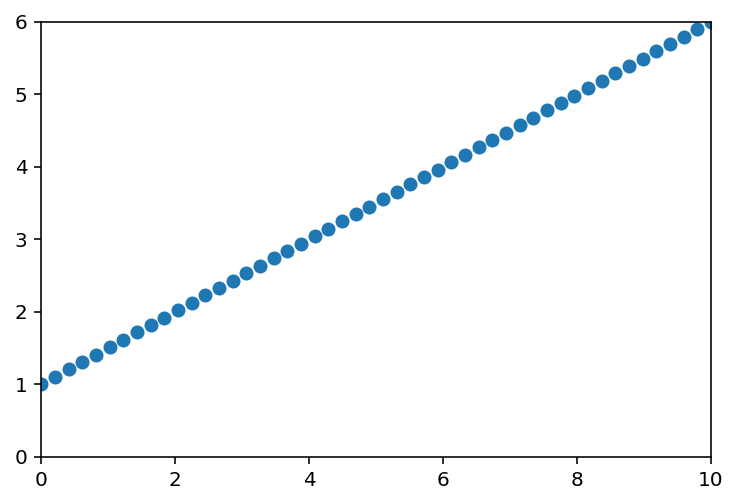

In [7]:
x = np.linspace(0,10,50)
y = 0.5*x + 1
plt.scatter(x, y)
ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,6)

the input `X` should be an 2D array  
Each row is the **sample**  
Each column is the **feature**

In [9]:
X = x[:, np.newaxis]
print(x.shape)
print(X.shape)

(50,)
(50, 1)


sklearn process:  
1. select model and hyperparameters
2. `fit(X, y)` 
3. `predict` or `transform`

**Hyperparameters** = the settings of the model

Create some artificial data

In [22]:
x = np.linspace(0,10,50)
y = 0.5*x + 1 + 0.1*np.random.randn(50)
X = x[:, np.newaxis]

In [24]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
y_model = model.predict(X)

(0, 6)

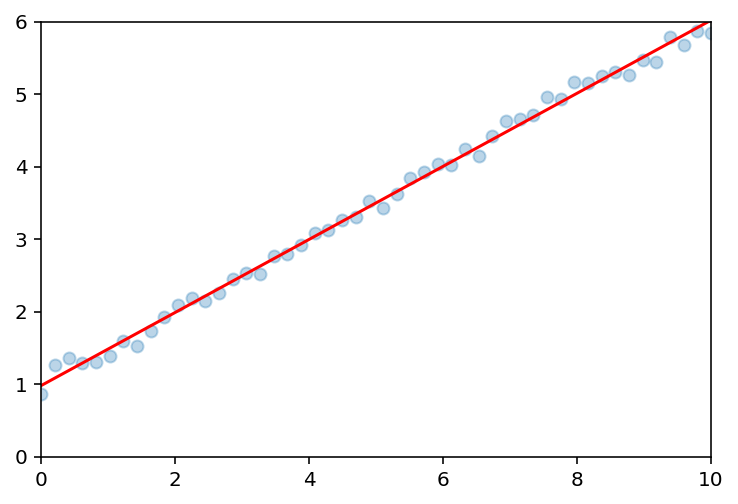

In [25]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,6)

In [26]:
model.coef_

array([0.50389193])

In [27]:
model.intercept_

0.9810323093328495

In [28]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_model = model.predict(X)

(0, 6)

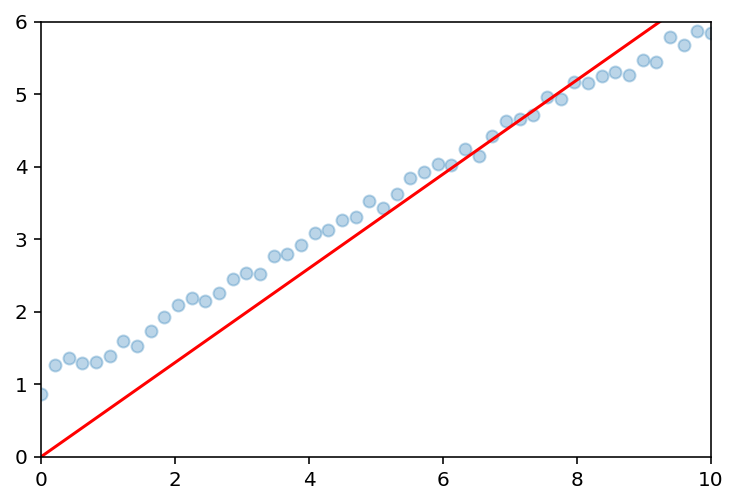

In [29]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,6)

Polynomial?

(0, 10)

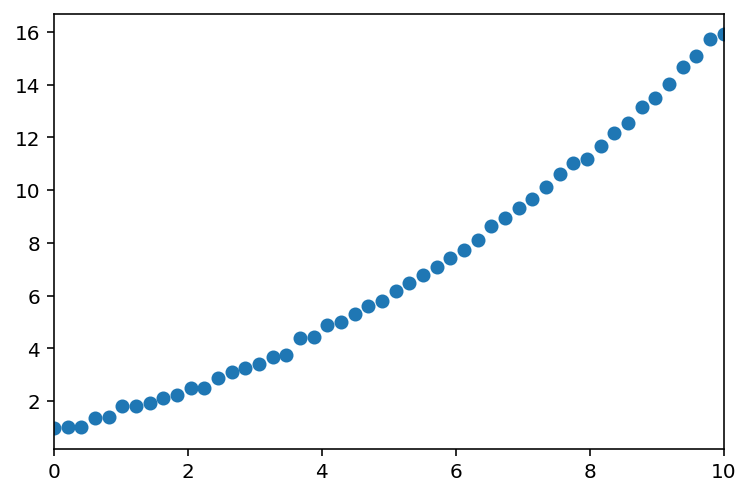

In [32]:
x = np.linspace(0,10,50)
y = 0.1*x**2 + 0.5*x + 1 + 0.1*np.random.randn(50)
X = x[:, np.newaxis]
plt.scatter(x, y)
ax = plt.gca()
ax.set_xlim(0,10)

(0, 10)

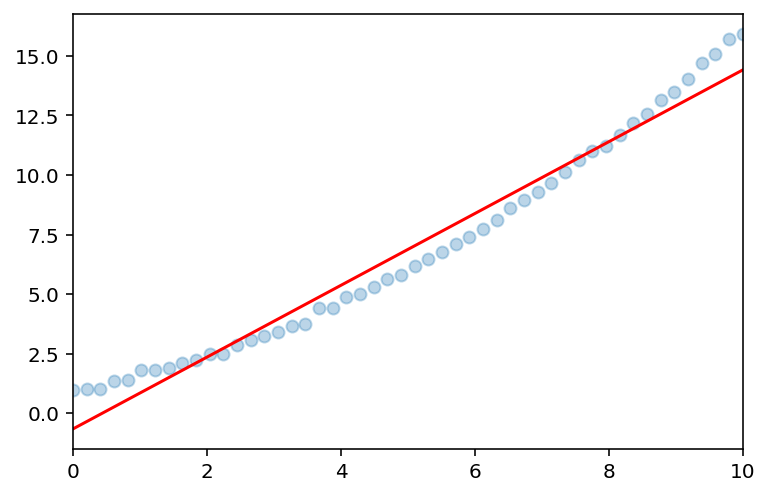

In [34]:
model = LinearRegression()
model.fit(X, y)
y_model = model.predict(X)

plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca()
ax.set_xlim(0,10)

In [35]:
import pandas as pd

In [42]:
df = pd.DataFrame(X, 
                  columns=['x'])
df['x^2'] = x**2
df['1'] = 1
df = df[['1', 'x', 'x^2']]
df.head()

,1,x,x^2
0,1,0.000000,0.000000
1,1,0.204082,0.041649
2,1,0.408163,0.166597
3,1,0.612245,0.374844
4,1,0.816327,0.666389


In [44]:
new_X = df.values

In [46]:
model = LinearRegression(fit_intercept=False)
model.fit(new_X, y)
y_model = model.predict(new_X)

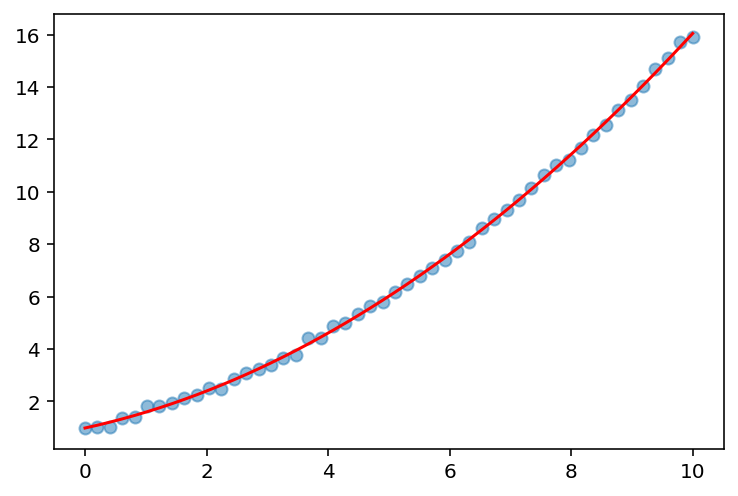

In [47]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_model, color='red')

In [48]:
model.coef_

array([0.98085346, 0.50606076, 0.10001344])

Pipeline

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
change = PolynomialFeatures(degree=2)
change.fit(X)
change.transform(X)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04081633e-01, 4.16493128e-02],
       [1.00000000e+00, 4.08163265e-01, 1.66597251e-01],
       [1.00000000e+00, 6.12244898e-01, 3.74843815e-01],
       [1.00000000e+00, 8.16326531e-01, 6.66389005e-01],
       [1.00000000e+00, 1.02040816e+00, 1.04123282e+00],
       [1.00000000e+00, 1.22448980e+00, 1.49937526e+00],
       [1.00000000e+00, 1.42857143e+00, 2.04081633e+00],
       [1.00000000e+00, 1.63265306e+00, 2.66555602e+00],
       [1.00000000e+00, 1.83673469e+00, 3.37359434e+00],
       [1.00000000e+00, 2.04081633e+00, 4.16493128e+00],
       [1.00000000e+00, 2.24489796e+00, 5.03956685e+00],
       [1.00000000e+00, 2.44897959e+00, 5.99750104e+00],
       [1.00000000e+00, 2.65306122e+00, 7.03873386e+00],
       [1.00000000e+00, 2.85714286e+00, 8.16326531e+00],
       [1.00000000e+00, 3.06122449e+00, 9.37109538e+00],
       [1.00000000e+00, 3.26530612e+00, 1.06622241e+01],
       [1.00000000e+00, 3.46938

In [53]:
from sklearn.pipeline import make_pipeline

In [54]:
pipe = make_pipeline(PolynomialFeatures(degree=2), 
              LinearRegression(fit_intercept=False))

In [56]:
pipe.fit(X, y)
y_model = pipe.predict(X)

In [60]:
pipe.steps[1][1].coef_

array([0.98085346, 0.50606076, 0.10001344])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier?

In [10]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y, y_model)

1.0

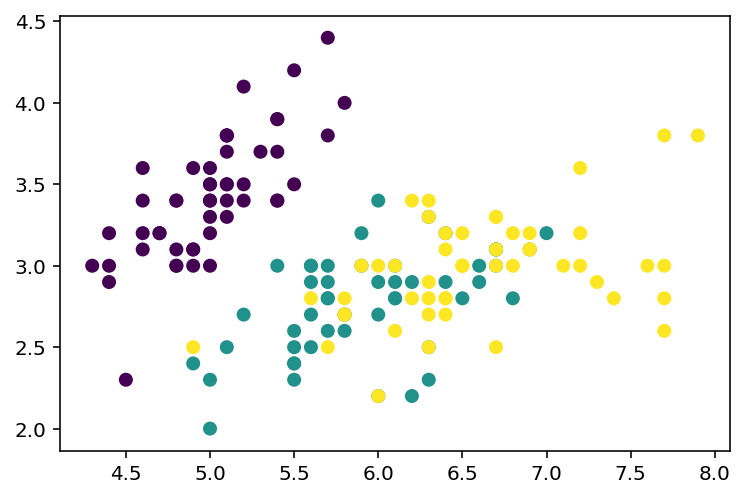

In [16]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [18]:
### sklearn.cross_validation --> sklearn.model_selection
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [23]:
X_train.shape

(75, 4)

In [24]:
X_test.shape

(75, 4)

In [28]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
### y_test is the real answer
### y_model is the predicted answer

In [30]:
accuracy_score(y_test, y_model)

0.9333333333333333

In [31]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_test, y_test)
y_model = model.predict(X_train)
### y_train is the real answer
### y_model is the predicted answer

In [32]:
accuracy_score(y_train, y_model)

0.9733333333333334

In [34]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(model, X, y, cv=5).mean()

0.96

In [41]:
for k in range(1,31):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X, y, cv=5).mean()
    print(k, score)

1 0.96
2 0.9466666666666665
3 0.9666666666666668
4 0.9733333333333334
5 0.9733333333333334
6 0.9800000000000001
7 0.9800000000000001
8 0.9666666666666668
9 0.9733333333333334
10 0.9800000000000001
11 0.9800000000000001
12 0.9800000000000001
13 0.9733333333333334
14 0.9666666666666666
15 0.9666666666666668
16 0.9666666666666668
17 0.9666666666666668
18 0.9666666666666666
19 0.9666666666666668
20 0.96
21 0.9666666666666668
22 0.96
23 0.96
24 0.9466666666666667
25 0.96
26 0.9466666666666665
27 0.9466666666666667
28 0.9399999999999998
29 0.9333333333333332
30 0.9399999999999998


scikit learn -> sklearn

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [ ]:
### do not do this
import sklearn 
sklearn.datasets.load_iris()

Create some artificial data

(0, 6)

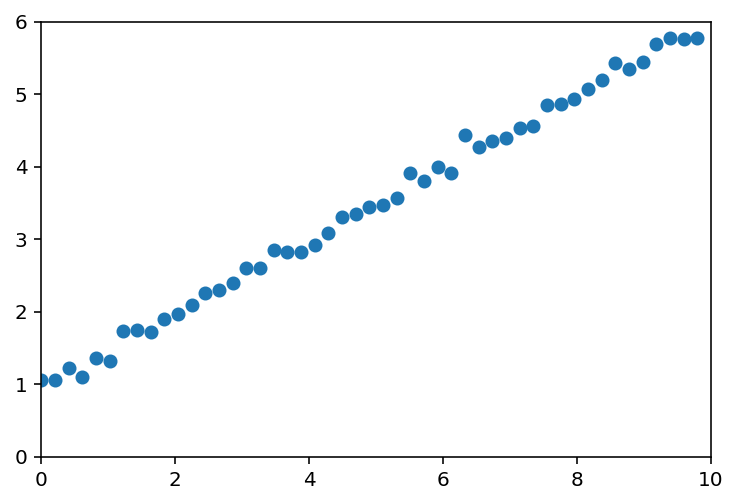

In [9]:
x = np.linspace(0, 10, 50)
y = 0.5*x + 1 + 0.1*np.random.randn(50)
X = x[:,np.newaxis] 
### x.shape == (50, )
### X.shape == (50,1)

plt.scatter(x, y)
ax = plt.gca() ### get current axes
ax.set_xlim(0,10)
ax.set_ylim(0,6)

process for using sklearn:  
1. select the model and the hyperparameteres (keywords)
2. `model.fit(data, label)`
3. `model.predict(data)` or `transform`

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_model = model.predict(X)
### y: real answer
### y_model: predicted answer

(0, 6)

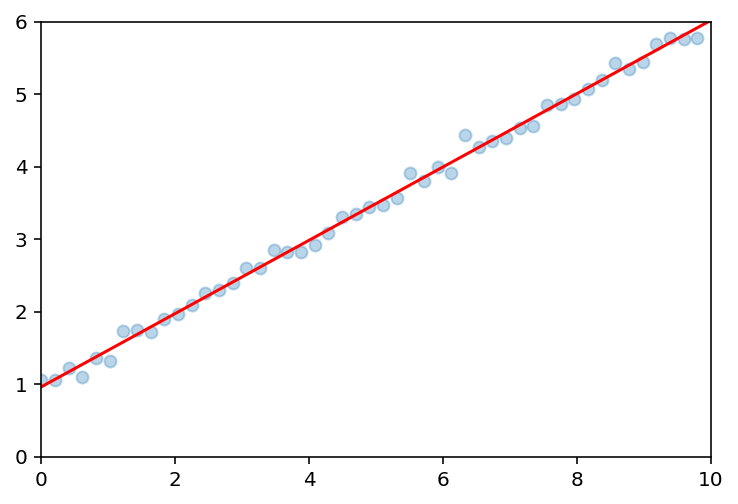

In [16]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca() ### get current axes
ax.set_xlim(0,10)
ax.set_ylim(0,6)

In [17]:
model.coef_

array([0.50573794])

In [18]:
model.intercept_

0.9620876370914178

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_model = model.predict(X)
### y: real answer
### y_model: predicted answer

(0, 6)

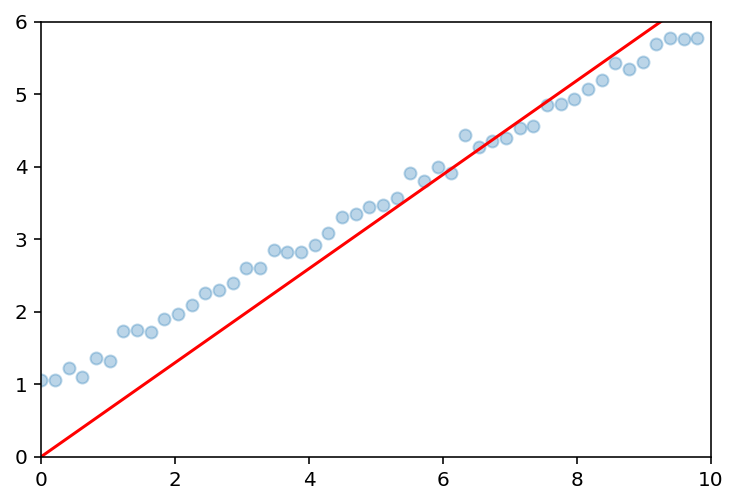

In [24]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca() ### get current axes
ax.set_xlim(0,10)
ax.set_ylim(0,6)

Polynomial regression

Create artificial data

(0, 10)

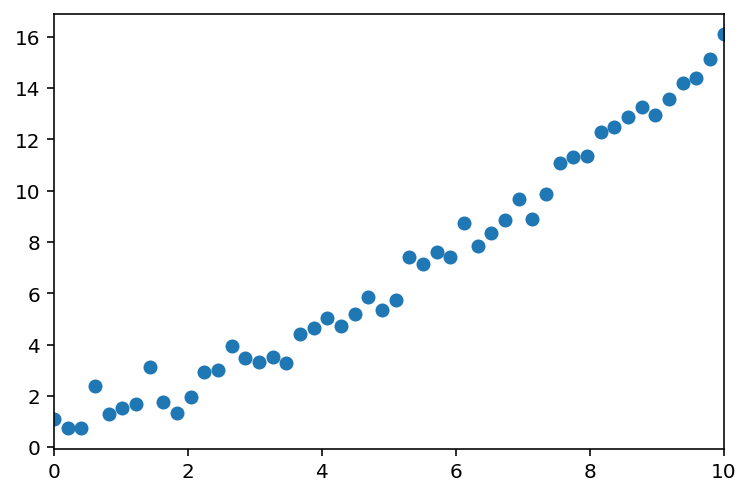

In [30]:
x = np.linspace(0, 10, 50)
y = 0.1*x**2 + 0.5*x + 1 + 0.5*np.random.randn(50)
X = x[:, np.newaxis]

plt.scatter(x, y)
ax = plt.gca() ### get current axes
ax.set_xlim(0,10)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_model = model.predict(X)
### y: real answer
### y_model: predicted answer

(0, 10)

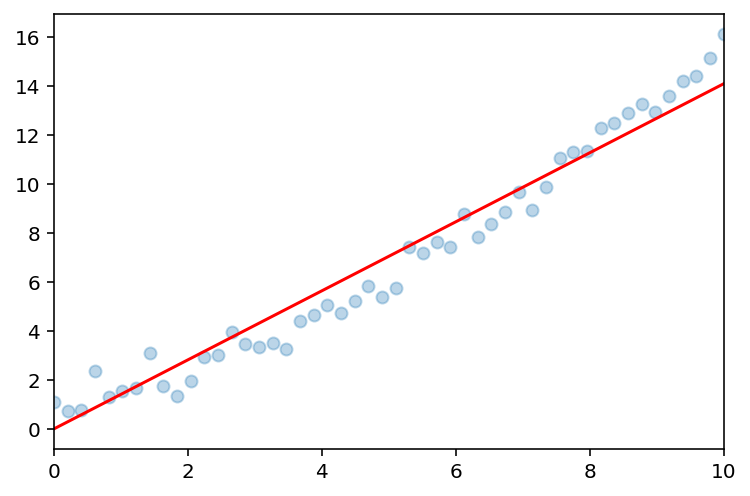

In [32]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca() ### get current axes
ax.set_xlim(0,10)

In [37]:
df = pd.DataFrame(X, 
                 columns=['x'])
df['x^2'] = x**2
df['1'] = 1
df = df[['1', 'x', 'x^2']]
df.head()

,1,x,x^2
0,1,0.000000,0.000000
1,1,0.204082,0.041649
2,1,0.408163,0.166597
3,1,0.612245,0.374844
4,1,0.816327,0.666389


In [40]:
X_new = df.values

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_new, y)
y_model = model.predict(X_new)
### y: real answer
### y_model: predicted answer

(0, 10)

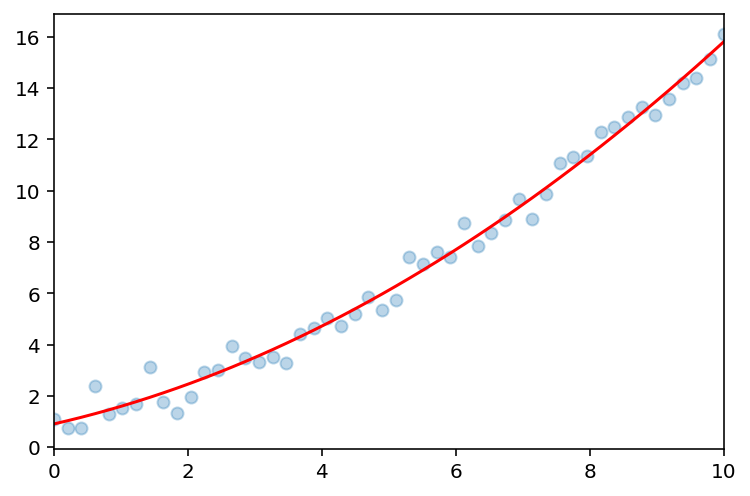

In [43]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

ax = plt.gca() ### get current axes
ax.set_xlim(0,10)

In [44]:
model.coef_

array([0.90944699, 0.59592138, 0.08935351])

Pipeline

In [45]:
from sklearn.preprocessing import PolynomialFeatures
change = PolynomialFeatures?

In [46]:
change = PolynomialFeatures(degree=2)
change.fit(X)
change.transform(X)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04081633e-01, 4.16493128e-02],
       [1.00000000e+00, 4.08163265e-01, 1.66597251e-01],
       [1.00000000e+00, 6.12244898e-01, 3.74843815e-01],
       [1.00000000e+00, 8.16326531e-01, 6.66389005e-01],
       [1.00000000e+00, 1.02040816e+00, 1.04123282e+00],
       [1.00000000e+00, 1.22448980e+00, 1.49937526e+00],
       [1.00000000e+00, 1.42857143e+00, 2.04081633e+00],
       [1.00000000e+00, 1.63265306e+00, 2.66555602e+00],
       [1.00000000e+00, 1.83673469e+00, 3.37359434e+00],
       [1.00000000e+00, 2.04081633e+00, 4.16493128e+00],
       [1.00000000e+00, 2.24489796e+00, 5.03956685e+00],
       [1.00000000e+00, 2.44897959e+00, 5.99750104e+00],
       [1.00000000e+00, 2.65306122e+00, 7.03873386e+00],
       [1.00000000e+00, 2.85714286e+00, 8.16326531e+00],
       [1.00000000e+00, 3.06122449e+00, 9.37109538e+00],
       [1.00000000e+00, 3.26530612e+00, 1.06622241e+01],
       [1.00000000e+00, 3.46938

In [47]:
from sklearn.pipeline import make_pipeline

In [48]:
pipe = make_pipeline(PolynomialFeatures(degree=2), 
              LinearRegression(fit_intercept=False))

In [49]:
pipe.fit(X, y)
y_model = pipe.predict(X)

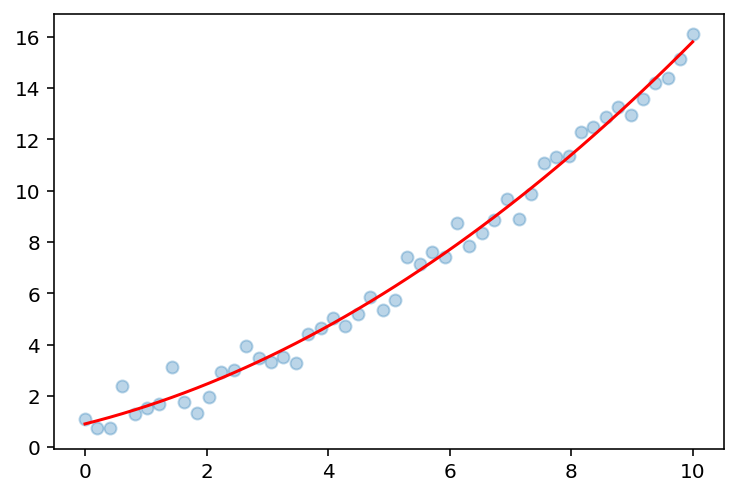

In [50]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

In [57]:
pipe.steps[1][1].coef_

array([0.90944699, 0.59592138, 0.08935351])

classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
### in HW, load_boston
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y, y_model)

1.0

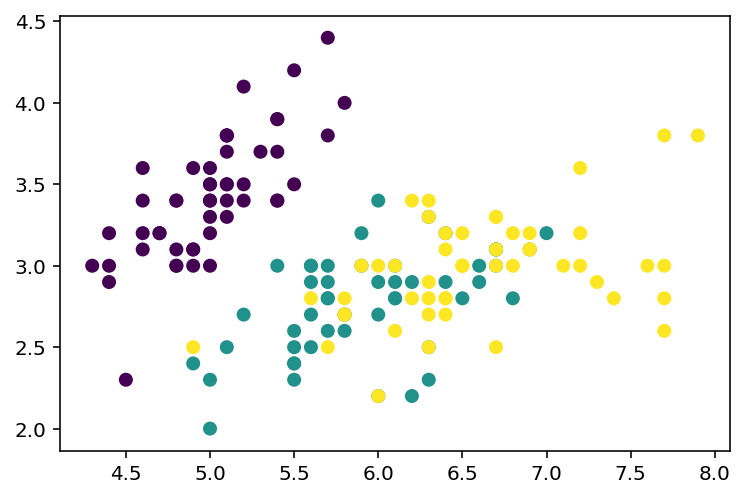

In [12]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap='viridis')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [24]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
### y_test: the real answer
### y_model: the predicted answer
accuracy_score(y_test, y_model)

0.9866666666666667

In [25]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_test, y_test)
y_model = model.predict(X_train)
### y_test: the real answer
### y_model: the predicted answer
accuracy_score(y_train, y_model)

0.9466666666666667

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.96

In [30]:
for k in range(1,31):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X, y, cv=5).mean()
    print(k, score)

1 0.96
2 0.9466666666666665
3 0.9666666666666668
4 0.9733333333333334
5 0.9733333333333334
6 0.9800000000000001
7 0.9800000000000001
8 0.9666666666666668
9 0.9733333333333334
10 0.9800000000000001
11 0.9800000000000001
12 0.9800000000000001
13 0.9733333333333334
14 0.9666666666666666
15 0.9666666666666668
16 0.9666666666666668
17 0.9666666666666668
18 0.9666666666666666
19 0.9666666666666668
20 0.96
21 0.9666666666666668
22 0.96
23 0.96
24 0.9466666666666667
25 0.96
26 0.9466666666666665
27 0.9466666666666667
28 0.9399999999999998
29 0.9333333333333332
30 0.9399999999999998


See the textbook for GridSearchCV

`sklearn.cross_validation` --> `sklearn.model_selection`